In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
np.random.seed(10)

In [21]:
air_passengers = read_csv('AirPassengers.csv', usecols=[1])
data = air_passengers.values.astype('float32')

In [22]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

In [23]:
# split into train and test sets
train_size = int(len(data) * 0.67)
test_size = len(data) - train_size
train, test = data[0:train_size,:], data[train_size:len(data),:]
print('Training data size {}, test data size {}'.format(len(train), len(test)))

Training data size 96, test data size 48


In [24]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [25]:
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [26]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [38]:
trainX.shape

(92, 1, 3)

In [27]:
hidden_nodes = 4

model = Sequential()
model.add(LSTM(hidden_nodes, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 4)                 128       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
92/92 - 1s - loss: 0.0220
Epoch 2/100
92/92 - 0s - loss: 0.0084
Epoch 3/100
92/92 - 0s - loss: 0.0070
Epoch 4/100
92/92 - 0s - loss: 0.0062
Epoch 5/100
92/92 - 0s - loss: 0.0056
Epoch 6/100
92/92 - 0s - loss: 0.0050
Epoch 7/100
92/92 - 0s - loss: 0.0046
Epoch 8/100
92/92 - 0s - loss: 0.0043
Epoch 9/100
92/92 - 0s - loss: 0.0041
Epoch 10/100
92/92 - 0s - loss: 0.0039
Epoch 11/100
92/92 - 0s - loss: 0.0039
Epoch 12/100
92/92 - 0s - loss: 0.0037
Epoch 13/100
92/92 - 0s - loss: 0.0037
Epoch 14/100
92/92 - 0s - loss: 0.0036
Epoch 15/100
92/92 - 0s - loss: 0.0036
Epoch 16/100
92/92 - 0s - loss: 0.0036
Epoch 17/100
92/92 - 0s - loss: 0.0037
Epoch 18/100
92/92 - 0s - loss: 0.0034
Epoch 19/100
92/92 - 0s - loss: 0.0036
Epoch 20/100
92/92 - 0s - loss: 0.0034
Epoch 21/100
92/92 - 0s - loss: 0.0033
Epoch 22/100
92/92 - 0s - loss: 0.0034
Epoch 23/100
92/92 - 0s - loss: 0.0033
Epoch 24/100
92/92 - 0s - loss: 0.0032
Epoch 25/100
92/92 - 0s - loss: 0.0032
Epoch 26/100
92/92 - 0s - loss: 0.

In [29]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [31]:
# Inverse transfor the predited values to calculate the error on the same scale as the original data
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [32]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.14 RMSE
Test Score: 54.96 RMSE


In [42]:
# shift train and test predictions for plotting
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(data)-1, :] = testPredict

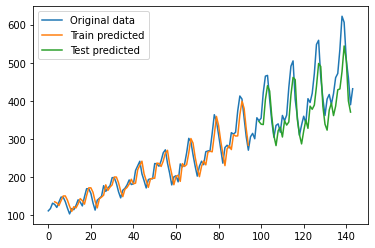

In [45]:
plt.plot(scaler.inverse_transform(data), label='Original data')
plt.plot(trainPredictPlot, label='Train predicted')
plt.plot(testPredictPlot, label='Test predicted')
plt.legend()
plt.show()